# Klasifikasi Kanker Payudara dengan menggunakan metode Support Vector Machine

## Import Library yang diperlukan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Datasets

In [2]:
cancer = pd.read_csv("breast_cancer.csv")
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
descriptive_stats = cancer.describe()
print("statistik deskriptif")
print(descriptive_stats)

statistik deskriptif
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064  

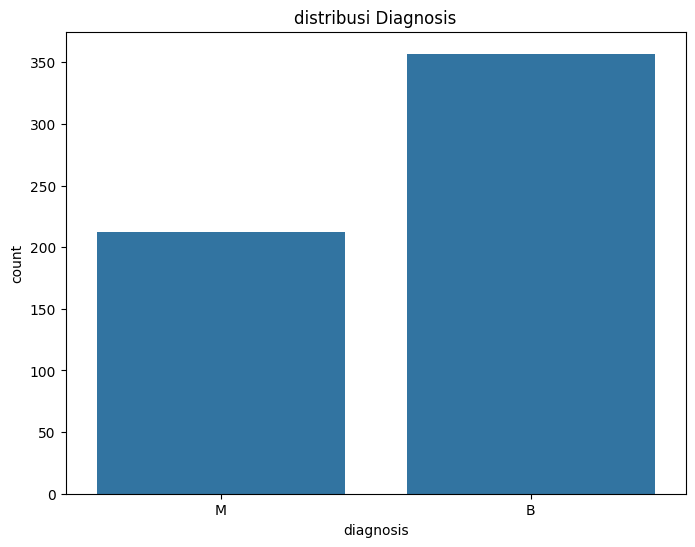

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=cancer)
plt.title("distribusi Diagnosis")
plt.show()

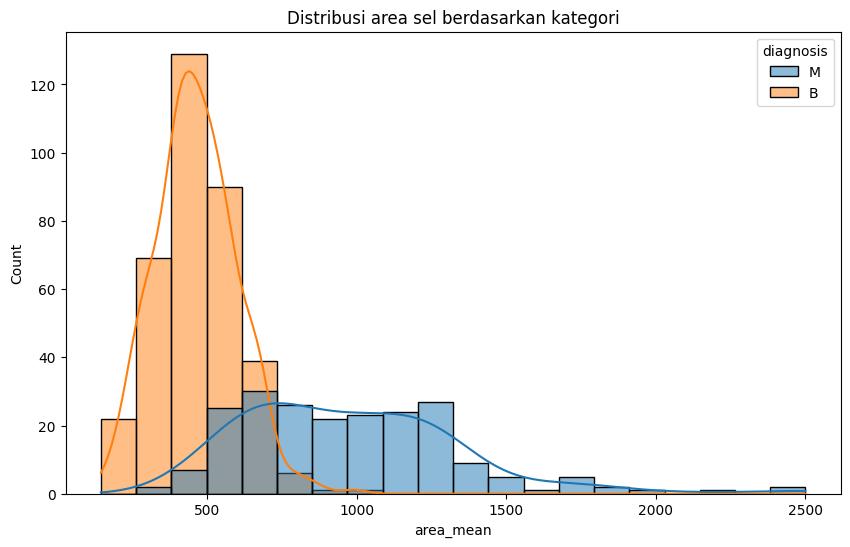

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=cancer, x="area_mean", hue="diagnosis", kde=True, bins=20)
plt.title("Distribusi area sel berdasarkan kategori")
plt.show()

## Pengecekan Nilai NaN

In [8]:
nan_info = cancer.isnull().sum()
nan_columns = nan_info[nan_info > 0]
print("fitur dengan nilai NaN")
nan_columns

fitur dengan nilai NaN


Unnamed: 32    569
dtype: int64

In [9]:
cancer = cancer.drop("Unnamed: 32", axis="columns")

In [10]:
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## penghapusan fitur yang tidak relevan

In [11]:
cancer = cancer.drop("id", axis="columns")

In [12]:
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## Spliting data

In [13]:
X = cancer.drop("diagnosis", axis="columns")
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## Standarisasi Z-Score 

In [14]:
scaler = StandardScaler()

fitur_scale = []
for data in X_train.columns:
    if X_train[data].min() < 0 or X_train[data].max() > 1:
        fitur_scale.append(data)
scaler.fit(X_train[fitur_scale])
X_train[fitur_scale] = scaler.transform(X_train[fitur_scale])
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
408     1.044985      0.297085        1.010448   0.903128          0.10360   
4       1.681411     -1.140982        1.703381   1.746022          0.10030   
307    -1.442609     -1.127329       -1.450464  -1.154826          0.07005   
386    -0.554380     -1.197867       -0.552455  -0.559306          0.08108   
404    -0.518408     -1.002181       -0.572082  -0.539704          0.08682   
..           ...           ...             ...        ...              ...   
129     1.543057      1.311923        1.515127   1.456131          0.10150   
144    -0.958372     -0.997630       -0.973822  -0.853891          0.07793   
72      0.826387      1.175398        0.866254   0.731126          0.10710   
235    -0.050774      0.431335       -0.111462  -0.168919          0.09070   
37     -0.327480     -0.212609       -0.399049  -0.388684          0.08983   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
408           0.13040        0.120100             0.088240         0.1992   
4             0.13280        0.198000             0.104300         0.1809   
307           0.03116        0.003681             0.003472         0.1788   
386           0.07823        0.068390             0.025340         0.1646   
404           0.04571        0.021090             0.020540         0.1571   
..                ...             ...                  ...            ...   
129           0.15890        0.254500             0.114900         0.2202   
144           0.05139        0.022510             0.007875         0.1399   
72            0.18300        0.169200             0.079440         0.1927   
235           0.06945        0.014620             0.018960         0.1517   
37            0.03766        0.025620             0.029230         0.1467   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
408                 0.06069  ...      0.932100      -0.046983   
4                   0.05883  ...      1.223617      -1.438180   
307                 0.06833  ...     -1.340339      -0.896982   
386                 0.06154  ...     -0.655273      -1.021139   
404                 0.05708  ...     -0.645289      -1.409529   
..                      ...  ...           ...            ...   
129                 0.06113  ...      1.241587       1.253484   
144                 0.05688  ...     -0.890883      -0.793518   
72                  0.06487  ...      1.379359       1.291686   
235                 0.05835  ...     -0.216000       0.728203   
37                  0.05863  ...     -0.621329      -0.460840   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
408         0.857380    0.754906           0.14820            0.37350   
4           1.262419    1.135042           0.13740            0.20500   
307        -1.360278   -1.033921           0.09861            0.05232   
386        -0.591854   -0.622836           0.10260            0.24310   
404        -0.693544   -0.617453           0.10480            0.06744   
..               ...         ...               ...                ...   
129         1.161877    1.158590           0.12750            0.38610   
144        -0.875094   -0.772031           0.10760            0.12230   
72          1.245183    1.313336           0.15850            0.73940   
235        -0.286782   -0.310653           0.12870            0.15130   
37         -0.683490   -0.595923           0.09701            0.04619   

     concavity_worst  concave points_worst  symmetry_worst  \
408         0.284225               0.19740          0.3060   
4           0.626789               0.16250          0.2364   
307        -1.261384               0.01389          0.2991   
386         0.173957               0.09140          0.2677   
404        -1.092356               0.04793          0.2298   
..               ...                   ...             ...   
129         1.446690               0.17320         

## Balancing Data

In [15]:
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [16]:
ros = RandomOverSampler(random_state=1)
X_resample, y_resample = ros.fit_resample(X_train, y_train)
print(X_resample.shape)
print(y_resample.shape)

(570, 30)
(570,)


## Normalisasi untuk data testing

In [17]:
X_test[fitur_scale] = scaler.transform(X_test[fitur_scale])
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
421     0.131853     -1.222897        0.226193  -0.023421          0.10310   
47     -0.288741     -0.157999       -0.264067  -0.358867          0.11580   
292    -0.349617     -0.758711       -0.377820  -0.416569          0.10050   
186     1.133531     -0.176203        1.042491   1.039239          0.08588   
414     0.253604      2.379096        0.165711   0.151619          0.08320   
..           ...           ...             ...        ...              ...   
172     0.344917     -1.698460        0.397623   0.199658          0.12570   
3      -0.772978      0.233373       -0.600520  -0.768856          0.14250   
68     -1.434584     -0.460630       -1.353133  -1.143230          0.10660   
448     0.087580     -0.003271        0.067179  -0.013482          0.08388   
442    -0.119950     -0.811045       -0.168338  -0.217234          0.08817   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
421           0.18360         0.14500             0.063000         0.2086   
47            0.12310         0.12260             0.073400         0.2128   
292           0.07943         0.06155             0.033700         0.1730   
186           0.08468         0.08169             0.058140         0.1621   
414           0.04605         0.04686             0.027390         0.1852   
..                ...             ...                  ...            ...   
172           0.15550         0.20320             0.109700         0.1966   
3             0.28390         0.24140             0.105200         0.2597   
68            0.14130         0.31300             0.043750         0.2111   
448           0.07800         0.08817             0.029250         0.1473   
442           0.06718         0.01055             0.009937         0.1405   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
421                 0.07406  ...      0.009627      -1.172357   
47                  0.06777  ...     -0.148112       0.357324   
292                 0.06470  ...     -0.533474      -0.919267   
186                 0.05425  ...      0.978024       0.104234   
414                 0.05294  ...      0.169362       1.783539   
..                      ...  ...           ...            ...   
172                 0.07069  ...      0.474857      -1.379285   
3                   0.09744  ...     -0.299861       0.126519   
68                  0.08046  ...     -1.218340      -0.486309   
448                 0.05746  ...     -0.022320       0.427361   
442                 0.05848  ...     -0.227980      -1.306064   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
421         0.167953   -0.153048            0.1312            0.36350   
47         -0.156653   -0.236812            0.1786            0.41660   
292        -0.558532   -0.529484            0.1483            0.20680   
186         0.888979    0.857509            0.1234            0.24450   
414         0.053048    0.052495            0.1148            0.09866   
..               ...         ...               ...                ...   
172         0.481068    0.339447            0.1531            0.35830   
3          -0.269547   -0.559255            0.2098            0.86630   
68         -1.228138   -0.967986            0.1482            0.43650   
448        -0.004404   -0.117221            0.1089            0.26490   
442        -0.297411   -0.325623            0.1072            0.10710   

     concavity_worst  concave points_worst  symmetry_worst  \
421         0.244038               0.11080          0.2827   
47          1.119808               0.20880          0.3900   
292        -0.235258               0.10560          0.3380   
186         0.400373               0.15710          0.3206   
414        -0.575372               0.06575          0.3233   
..               ...                   ...             ...   
172         1.523632               0.18270         

## Modeling menggunakan SVM

In [18]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42, class_weight="balanced")
svm_model.fit(X_resample, y_resample)

SVC(class_weight='balanced', kernel='linear', random_state=42)

## Akurasi

In [19]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.956140350877193

## mengukur confusion matrix

In [20]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[71,  1],
       [ 4, 38]])

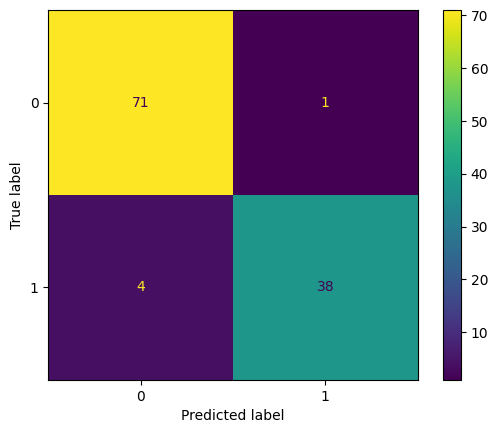

In [21]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [0, 1])
cm_display.plot()
plt.show()